1. Import Libraries & Load Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from KaggleHub path
df = pd.read_csv( '/content/Sleep_health_and_lifestyle_dataset.csv')

df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


2. Inspect & Clean the Data

In [10]:
# Basic structure
df.info()

# Summary statistics
df.describe(include='all')

# Check missing values
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Handle Missing Values

In [11]:
df = df.dropna()   # or impute if needed


Standardize Column Names

In [12]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()


,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea


3. Exploratory Data Analysis (EDA)


Distribution of Sleep Duration

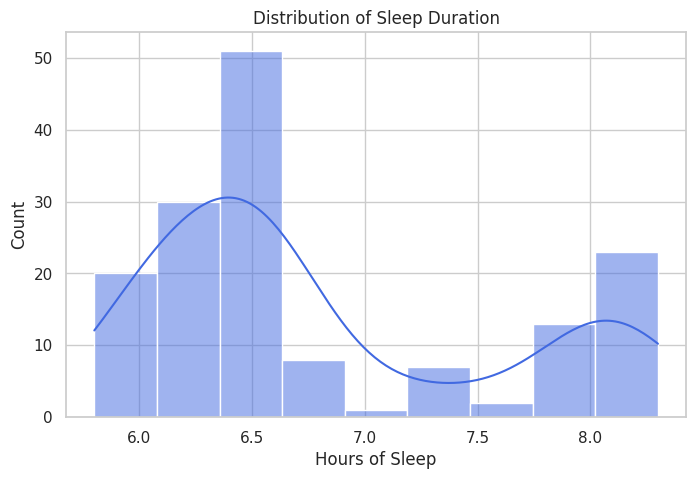

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['sleep_duration'], kde=True, color='royalblue')
plt.title("Distribution of Sleep Duration")
plt.xlabel("Hours of Sleep")
plt.ylabel("Count")
plt.show()


Sleep Duration by Occupation

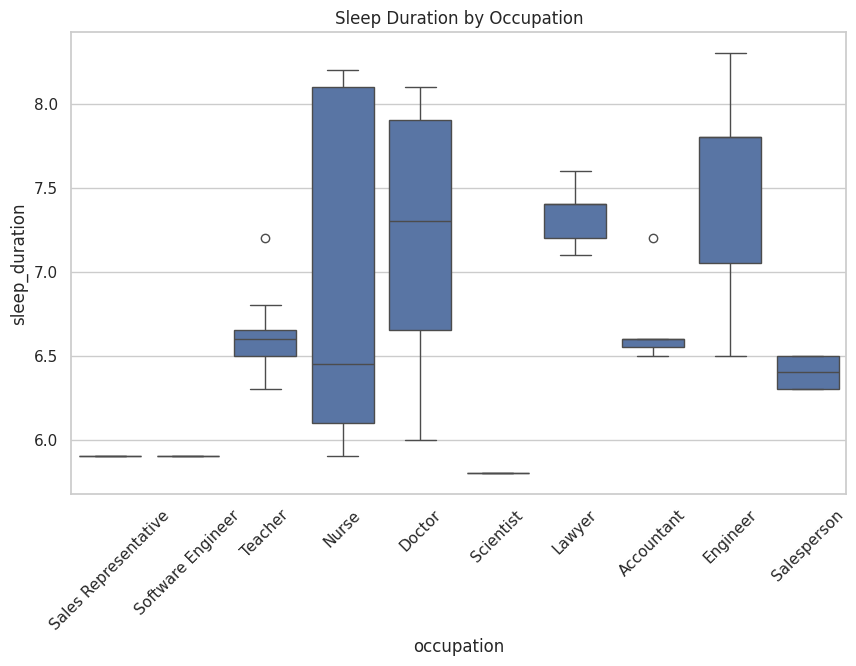

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='occupation', y='sleep_duration')
plt.xticks(rotation=45)
plt.title("Sleep Duration by Occupation")
plt.show()


Relationship Between Stress & Sleep

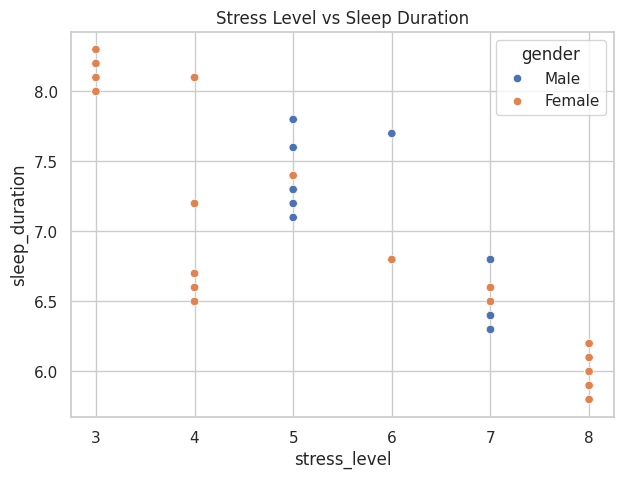

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='stress_level', y='sleep_duration', hue='gender')
plt.title("Stress Level vs Sleep Duration")
plt.show()


Correlation Heatmap

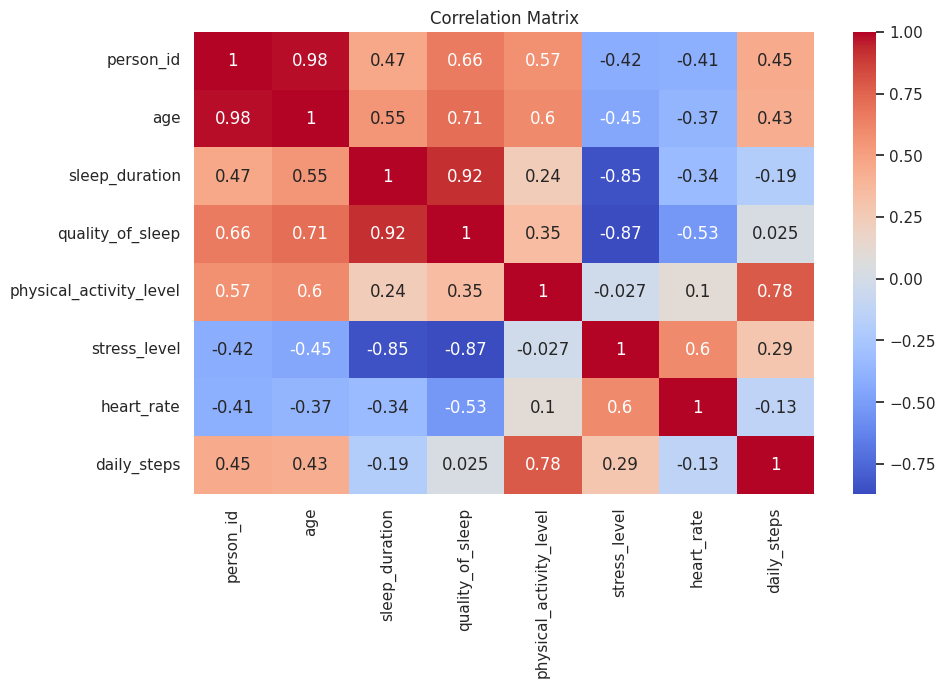

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
